In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import cv2
import os

# Data Preprocessing

In [2]:
DATADIR=r"C:\Users\dell\Desktop\Machine Learning\Face Mask Detection Model\Dataset"
CATEGORIES=os.listdir(DATADIR)

In [3]:
print(CATEGORIES)

['without_mask', 'with_mask']


In [4]:
labels=[i for i in range(len(CATEGORIES))]

In [5]:
labels

[0, 1]

In [6]:
label_dict = dict(zip(CATEGORIES,labels))

In [7]:
label_dict

{'without_mask': 0, 'with_mask': 1}

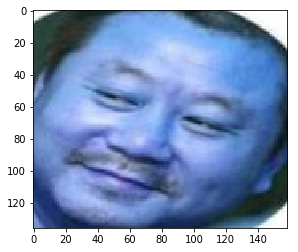

In [8]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category) # path to without_mask or with_mask
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2GRAY)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
    

In [9]:
print(img_array)

[[[253 253 253]
  [254 254 254]
  [250 252 252]
  ...
  [255 255 255]
  [253 255 255]
  [253 255 255]]

 [[255 255 255]
  [253 255 255]
  [246 248 248]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[249 251 251]
  [249 251 251]
  [248 253 252]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 254]]

 ...

 [[119 149 204]
  [118 148 203]
  [118 147 204]
  ...
  [255 253 253]
  [253 253 253]
  [253 252 254]]

 [[122 155 201]
  [117 150 196]
  [115 148 197]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[119 155 195]
  [113 149 189]
  [110 145 189]
  ...
  [253 253 253]
  [254 254 254]
  [255 255 255]]]


In [10]:
print(img_array.shape)

(136, 159, 3)


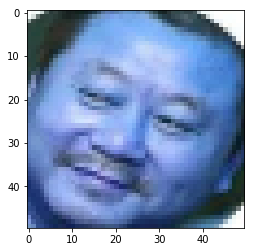

In [11]:
IMG_SIZE=50

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [12]:
print(new_array)

[[[253 254 254]
  [244 249 248]
  [242 252 251]
  ...
  [255 255 253]
  [255 255 254]
  [255 255 255]]

 [[245 251 249]
  [212 221 219]
  [103 117 114]
  ...
  [253 255 255]
  [255 255 254]
  [255 255 254]]

 [[144 159 155]
  [ 55  71  67]
  [ 42  63  57]
  ...
  [251 254 253]
  [255 255 254]
  [255 255 254]]

 ...

 [[106 129 196]
  [ 48  71 134]
  [ 49  72 129]
  ...
  [233 245 241]
  [250 250 246]
  [255 252 255]]

 [[125 150 216]
  [ 67  93 157]
  [ 46  71 131]
  ...
  [246 251 250]
  [254 254 251]
  [254 251 253]]

 [[116 150 195]
  [103 134 189]
  [ 48  76 138]
  ...
  [254 254 254]
  [255 255 254]
  [255 255 255]]]


# Building Training Data

In [13]:
img_size=100
data=[]
target=[]

for category in CATEGORIES:
    folder_path=os.path.join(DATADIR,category)
    img_names=os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path, img_name)
        img=cv2.imread(img_path)
        
        try:
            gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #Converting the image into grayscale
            resized=cv2.resize(gray,(img_size,img_size))  ##resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print("Exception: ",e)

In [14]:
data=np.array(data)/255.0

In [15]:
print(data)
print(data.shape[0])

[[[0.99215686 0.98823529 0.98823529 ... 1.         1.         1.        ]
  [0.99215686 0.98039216 0.97254902 ... 1.         1.         1.        ]
  [0.98823529 0.98823529 0.99607843 ... 1.         1.         1.        ]
  ...
  [0.64705882 0.63529412 0.53333333 ... 0.98431373 0.98039216 0.99215686]
  [0.63529412 0.62745098 0.6        ... 0.99607843 0.99607843 0.99607843]
  [0.63137255 0.60784314 0.60392157 ... 0.99607843 0.99215686 1.        ]]

 [[0.99607843 0.99215686 0.98823529 ... 0.97254902 0.94901961 0.9372549 ]
  [0.98823529 0.98039216 0.96470588 ... 0.96470588 0.94901961 0.94901961]
  [0.98823529 0.98039216 0.96470588 ... 0.95686275 0.95294118 0.9372549 ]
  ...
  [1.         1.         0.99607843 ... 0.93333333 0.9372549  0.94509804]
  [1.         1.         1.         ... 0.9254902  0.92941176 0.92941176]
  [1.         1.         1.         ... 0.92156863 0.9254902  0.91764706]]

 [[0.91764706 0.90588235 0.8        ... 0.27843137 0.26666667 0.25882353]
  [0.91764706 0.909803

In [16]:
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

In [17]:
data.shape

(3833, 100, 100, 1)

In [18]:
print(data)

[[[[0.99215686]
   [0.98823529]
   [0.98823529]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[0.99215686]
   [0.98039216]
   [0.97254902]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[0.98823529]
   [0.98823529]
   [0.99607843]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  ...

  [[0.64705882]
   [0.63529412]
   [0.53333333]
   ...
   [0.98431373]
   [0.98039216]
   [0.99215686]]

  [[0.63529412]
   [0.62745098]
   [0.6       ]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]

  [[0.63137255]
   [0.60784314]
   [0.60392157]
   ...
   [0.99607843]
   [0.99215686]
   [1.        ]]]


 [[[0.99607843]
   [0.99215686]
   [0.98823529]
   ...
   [0.97254902]
   [0.94901961]
   [0.9372549 ]]

  [[0.98823529]
   [0.98039216]
   [0.96470588]
   ...
   [0.96470588]
   [0.94901961]
   [0.94901961]]

  [[0.98823529]
   [0.98039216]
   [0.96470588]
   ...
   [0.95686275]
   [0.95294118]
   [0.9372549 ]]

  ...

  [[1.        ]
   [1.        ]
   [0.9

In [19]:
print(target.shape)

(3833,)


In [20]:
print(target)

[0 0 0 ... 1 1 1]


In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [22]:
new_target=np_utils.to_categorical(target)

In [23]:
print(new_target)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [24]:
np.save("data",data)
np.save("target",new_target)

# Training the CNN

In [29]:
data=np.load("data.npy")
target=np.load("target.npy")

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [31]:
model=Sequential()

In [32]:
#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [33]:
#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [35]:
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))
#Dense layer of 50 neurons
model.add(Dense(50,activation="relu"))

In [36]:
#The Final layer with two outputs for two categories
model.add(Dense(2,activation="softmax"))

In [37]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [40]:
import sklearn
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.1)

In [42]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(x_train,y_train,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 2759 samples, validate on 690 samples
Epoch 1/20
2752/2759 [============================>.] - ETA: 0s - loss: 0.6059 - accuracy: 0.6512

W0721 20:11:24.974182 12584 deprecation.py:506] From C:\Users\dell\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1781: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2759/2759 [==============================] - 363s 132ms/sample - loss: 0.6048 - accuracy: 0.6520 - val_loss: 0.4365 - val_accuracy: 0.7913
Epoch 2/20
2759/2759 [==============================] - 264s 96ms/sample - loss: 0.3956 - accuracy: 0.8191 - val_loss: 0.3128 - val_accuracy: 0.8696
Epoch 3/20
2759/2759 [==============================] - 263s 95ms/sample - loss: 0.3133 - accuracy: 0.8626 - val_loss: 0.2973 - val_accuracy: 0.8754
Epoch 4/20
2759/2759 [==============================] - 260s 94ms/sample - loss: 0.2617 - accuracy: 0.8902 - val_loss: 0.2897 - val_accuracy: 0.8681
Epoch 5/20
2759/2759 [==============================] - 256s 93ms/sample - loss: 0.2179 - accuracy: 0.9058 - val_loss: 0.2436 - val_accuracy: 0.8942
Epoch 6/20
2759/2759 [==============================] - 257s 93ms/sample - loss: 0.1771 - accuracy: 0.9275 - val_loss: 0.2399 - val_accuracy: 0.9014
Epoch 7/20
2759/2759 [==============================] - 261s 94ms/sample - loss: 0.1478 - accuracy: 0.9384 - val_los

In [43]:
model.save("FACEmaskTRAINEDMODEL.model")

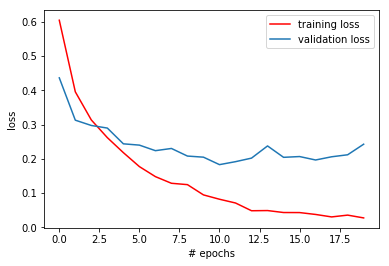

In [50]:
plt.plot(history.history['loss'],'r',label="training loss")
plt.plot(history.history['val_loss'],label="validation loss")
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

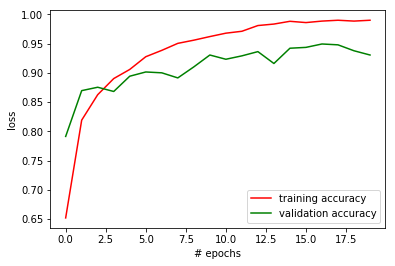

In [52]:
plt.plot(history.history['accuracy'],'r',label="training accuracy")
plt.plot(history.history['val_accuracy'],'g',label="validation accuracy")
plt.xlabel("# epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [53]:
print(model.evaluate(x_test,y_test))

384/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3811786916727821, 0.9140625]


# Detection

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import cv2
import numpy as np

In [7]:
model=load_model("model-011.model")

In [8]:
face_classifier=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'NO MASK',1:'MASK'}
color_dict={0:(0,0,255),1:(0,255,0)}


while(True):
    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)
        
        label=np.argmax(result,axis=1)[0]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    cv2.imshow("LIVE",img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break

cv2.destroyAllWindows()
source.release()